## 투표기반 분류기

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [11]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42) #가져올 샘플 수 , 노이즈

In [13]:
X.shape #특성은 2개임

(500, 2)

In [15]:
y.shape #이중 분류

(500,)

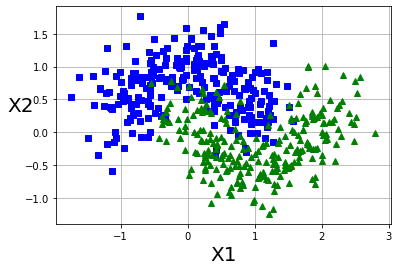

In [12]:
import matplotlib.pyplot as plt
def plot_dataset(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.grid(True, which='both')
    plt.xlabel("X1", fontsize=20)
    plt.ylabel("X2", fontsize=20, rotation=0)
plot_dataset(X, y)
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [20]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

In [24]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf),('rf', rnd_clf),('svc', svm_clf)],
    voting='hard'
)

In [26]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [28]:
for clf in (log_clf, rnd_clf , svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


* voting이 가장 좋다. 하드 보팅임에도 90퍼센트가 넘는다.

In [31]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True,random_state=42) #소프트 벡터머신에서 확률을 True로 해야 된다 predict_proba를 기준으로 soft voting하기 때문에. 

In [32]:
voting_clf_soft = VotingClassifier(
    estimators=[('lr', log_clf),('rf', rnd_clf),('svc', svm_clf)],
    voting='soft'
)

In [33]:
for clf in (log_clf, rnd_clf , svm_clf, voting_clf_soft):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


* 조금 더 좋은 0.92가 나왔다.

## 배깅 앙상블

In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=500,
                  random_state=42 ,max_samples=100, n_jobs=-1, bootstrap=True)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

In [39]:
y_pred = bag_clf.predict(X_test)

In [40]:
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test, y_pred)

0.904

## 비교

In [43]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
y_pred_tree = tree_clf.predict(X_test)
accuracy_score(y_test, y_pred_tree) #배기 앙상블이 더 높음을 알 수 있다.

0.856

In [45]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=500,
                  random_state=42 ,max_samples=100, oob_score=True, n_jobs=-1, bootstrap=True)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

In [47]:
bag_clf.oob_score_

0.9253333333333333

 ## 랜덤 포레스트

In [50]:
bag_clf = BaggingClassifier(
                DecisionTreeClassifier(random_state=42, max_leaf_nodes=16), n_estimators=500,
                random_state=42 ,max_samples=100, oob_score=True, n_jobs=-1, bootstrap=True
)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_leaf_nodes=16,
                                                        random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

In [54]:
y_pred_bag = bag_clf.predict(X_test)

In [55]:
accuracy_score(y_test, y_pred_bag)

0.904

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42) #가장 좋음.. 말 안됌..
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [56]:
y_pred_rnd = rnd_clf.predict(X_test)

In [57]:
accuracy_score(y_test, y_pred_rnd) 

0.912

* 같은 동작이라서 둘은 동일하게 돌아가지만 값이 다른 이유는 디폴트 값이 조금 달라서이다.